## Principal Component Analysis 


Today we work with the California housing price data set. For more information on the dataset, you can check here:

https://www.kaggle.com/camnugent/california-housing-prices

Our ultimate goal is to predict housing prices given the proximity to the ocean.

#### Step 0: Check working directory

In [54]:
import os
# get current working directory
cwd = os.getcwd()
print(cwd)

files = os.listdir(cwd)
print(files)

C:\Users\HuyenNguyen\Dropbox (Erasmus Universiteit Rotterdam)\Hamburg\TEACHING_UHH\WiSo21-22\Text Analysis for Social Sciences in Python\Exercises\W6
['.ipynb_checkpoints', 'future_encoders.py', 'housing.csv', 'W6_DimReduction.ipynb']


In [ ]:
#Import required basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Step 1: Import required packages, libraries and check the data

In [63]:
#Read the data
df_housing_dataset = pd.read_csv('C:/Users/HuyenNguyen/Dropbox (Erasmus Universiteit Rotterdam)/Hamburg/TEACHING_UHH/WiSo21-22/Text Analysis for Social Sciences in Python/Exercises/W6/housing_cali.csv')



In [64]:
#Check the head
df_housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [65]:
#Check the shape
df_housing_dataset.shape

(20640, 10)

In [66]:
#Desc stats on the data
df_housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [67]:
#technical information about different entries
df_housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Step 2: Visualize the data to understand relationships across variables

In [68]:
#Check correlations across variables
corr = df_housing_dataset.corr()
df_housing_dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


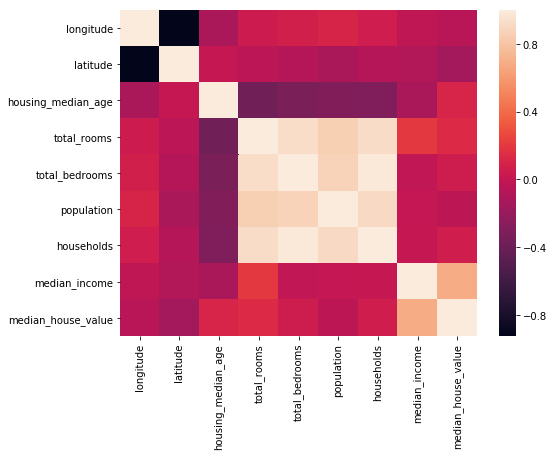

In [15]:
#Visualize Seaborn heatmap to view correlations between features in dataset
plt.figure(figsize=(8,6))
pltheatmap =sns.heatmap(corr)

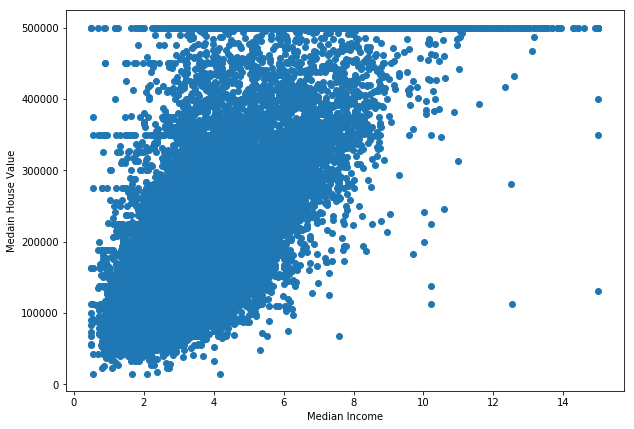

In [16]:
#Scatter plot of median income with median house value
plt.figure(figsize=(10,7))
plt.scatter(df_housing_dataset['median_income'],df_housing_dataset['median_house_value'])
plt.title='Scatter plot to correlate median income vs median house value'
plt.xlabel('Median Income')
plt.ylabel('Medain House Value')
plt.show()

In [17]:
#Get the list of unique location proximity to the ocean
df_housing_dataset.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
#Check how many null values are there
df_housing_dataset.ocean_proximity.isnull().sum()


0

In [45]:
#Slice dataset and store independent and dependent variables
X = df_housing_dataset.iloc[:,:-1].values
y = df_housing_dataset.iloc[:,9].values
print (X,y)

[[-1.2223e+02  3.7880e+01  4.1000e+01 ...  1.2600e+02  8.3252e+00
   4.5260e+05]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  1.1380e+03  8.3014e+00
   3.5850e+05]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  1.7700e+02  7.2574e+00
   3.5210e+05]
 ...
 [-1.2122e+02  3.9430e+01  1.7000e+01 ...  4.3300e+02  1.7000e+00
   9.2300e+04]
 [-1.2132e+02  3.9430e+01  1.8000e+01 ...  3.4900e+02  1.8672e+00
   8.4700e+04]
 [-1.2124e+02  3.9370e+01  1.6000e+01 ...  5.3000e+02  2.3886e+00
   8.9400e+04]] ['NEAR BAY' 'NEAR BAY' 'NEAR BAY' ... 'INLAND' 'INLAND' 'INLAND']


To perform dimensionality reduction, we need to standardize the data i.e. transform target variables with value between 0 and n_classes-1.

Important! This transformer should be used to encode target values, i.e. y, and NOT the input X.


In [46]:
#Label encode ocean proximity column (i.e. normalize the target)
from sklearn.preprocessing import LabelEncoder
ocean_proximity_labelencoder = LabelEncoder()
X[:,8] =  ocean_proximity_labelencoder.fit_transform(X[:,8])

In [47]:
#Check the 
X[:,8]

array([3665., 3074., 3017., ...,  508.,  432.,  479.])

**SIDE NOTE:** Label Encoder can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

See an example below.

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
list(le.classes_)
['amsterdam', 'paris', 'tokyo']

['amsterdam', 'paris', 'tokyo']

In [25]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1], dtype=int64)

In [26]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

**BACK TO EXERCISE**: Next we check for correlation between our X and Y variables.

In [48]:
#Convert X array from string to float format
X_slice = X[:,8].astype(np.float)

In [49]:
X_slice

array([3665., 3074., 3017., ...,  508.,  432.,  479.])

In [70]:
# Check Pearson product-moment correlation coefficient between Ocean proximity and Median house value
corr1 = np.corrcoef(X_slice,y.astype(np.float))
print(corr1)

ValueError: could not convert string to float: 'NEAR BAY'

C:\Users\HuyenNguyen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


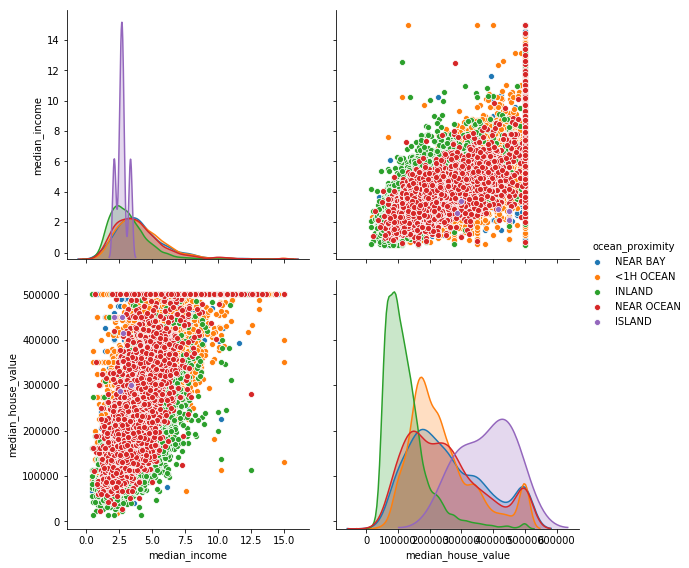

In [69]:
#Seaborn pairplot of median income vs median house value with hue as OCean Proximity
#hue="ocean_proximity"
sns.pairplot(df_housing_dataset, size=4 , 
             vars=["median_income","median_house_value"], hue="ocean_proximity")

### Step 3: Handling missing values

In [71]:
df_housing_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [72]:
df_X = pd.DataFrame(X)
df_X.isnull().sum()

0      0
1      0
2      0
3      0
4    207
5      0
6      0
7      0
8      0
dtype: int64

**Techniques to deal with mising values?**

There are many options we could consider when replacing a missing value, for example:

* A constant value that has meaning within the domain, such as 0, distinct from all other values.

* A value from another randomly selected record.

* A mean, median or mode value for the column.

* A value estimated by another predictive model.

**NOTE!** ANY imputing performed on the training dataset will have to be performed on new data in the future, when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.

E.g. if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.

For more information on imputation techniques with Scikitlearn and Python in general, please check these sources:

https://scikit-learn.org/stable/modules/impute.html

https://machinelearningmastery.com/handle-missing-data-python/

In [73]:
#==============================================================================
# We can see that in dataset there are some missing
# values, we will use strategy to impute mean of column values in these places
#==============================================================================

from sklearn.preprocessing import Imputer
# First create an Imputer
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', 
                               axis = 0)
# Set which columns imputer should perform
missingValueImputer = missingValueImputer.fit (X[:,4:5])
# update values of X with new values
X[:,4:5] = missingValueImputer.transform(X[:,4:5])

C:\Users\HuyenNguyen\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [74]:
#Notice missing values in "total bedrooms" column have been imputed with the mean of total bedrooms
df_X = pd.DataFrame(X)
df_X.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

### Step 4: Principal Component Analysis

In [75]:
X.shape

(20640, 9)

In [76]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X_std = stdsclr.fit_transform(X)

In [77]:
#PCA
from sklearn.decomposition.pca import PCA
PCA = PCA(n_components=6)
principal_components = PCA.fit_transform(X_std)

In [78]:
#Check the components
principal_components

array([[-1.95629537,  0.56320602,  3.53308091,  0.32916451,  0.32020269,
         0.12256262],
       [ 3.04055907,  1.28920677,  2.95972459, -0.27326405,  0.48789283,
        -0.45383943],
       [-1.87107423,  0.82245849,  2.770954  ,  1.21860572,  0.64865924,
        -0.03934875],
       ...,
       [-0.5239682 ,  2.13016413, -1.06583863, -1.00821353, -0.31042168,
        -0.25526781],
       [-0.93814677,  2.11074293, -1.0213694 , -1.05055741, -0.21825218,
        -0.30279273],
       [ 0.06689512,  2.13031321, -0.87525006, -1.03774798, -0.05001282,
        -0.21056542]])

In [89]:
#Cal the cumulative proportion of var explained by each component
PCA.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(PCA.explained_variance_ratio_))

Explained variation per principal component: [0.43426555 0.21371996 0.18746422 0.10112987 0.03348105 0.01608001]


It looks like a decent amount of information was retained by the principal components 1 and 2.



In [80]:
df_X = pd.DataFrame(X)
print(df_X.columns)

RangeIndex(start=0, stop=9, step=1)


In [81]:
df_housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [82]:
# Dump components relations with features: 
#This gives us the full picture of how features are related to components
print(pd.DataFrame(PCA.components_,columns=df_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6']))

             0         1         2         3         4         5         6  \
PC-1  0.075608 -0.075992 -0.216478  0.484767  0.488498  0.470079  0.490903   
PC-2 -0.661481  0.690896  0.000075  0.061681  0.072511  0.046580  0.072552   
PC-3 -0.250452  0.126101  0.047963  0.082105 -0.045209 -0.081358 -0.029397   
PC-4 -0.042185 -0.085811  0.931087  0.028244  0.123821  0.119707  0.144585   
PC-5  0.103581  0.079911  0.275715  0.164097 -0.132148  0.188557 -0.099103   
PC-6 -0.183036 -0.127344 -0.080751 -0.387908 -0.352926  0.806329 -0.073158   

             7         8  
PC-1  0.057518  0.052418  
PC-2 -0.177148 -0.192945  
PC-3  0.671439  0.672290  
PC-4 -0.209713  0.169087  
PC-5  0.636319 -0.642027  
PC-6 -0.031189  0.110630  


In [83]:
principal_components.shape

(20640, 6)

In [84]:
#Let's check our target label
y

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

In [86]:
#Split Dataset for model training and testing [80/20 split] 
#Note: if import with . model_selection doesn't work, try .cross_validation (due to renaming/deprecation of packages)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(principal_components,y, test_size=0.1,random_state=1)

In [87]:
X_train.shape


(18576, 6)

##### Your team exercise: 

Convert the y target variable to usable format for machine learning analysis (preparation for next week).

## Your bonus exercise:

Replicate the codes and analyses done in the following blog (a comparison betwen PCR and PLS):

https://www.datasklr.com/extensions-of-ols-regression/dimension-reduction-principal-components-regression

NOTE: The Boston housing data set has been deprecated from SKlearn because of ethical problems. Your task is to transform the codes in this blog to the Californian housing price data set, such that you can operationalize the 

**Any teams that submit such a coding solution to Slack channel BEFORE FRIDAY 10.12 will receive an upscale of 0.3 for your final course grade.**